In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.spatial as spatial
import perlin
import palletes

plt.rcParams['agg.path.chunksize'] = 10000

rng = np.random.default_rng()

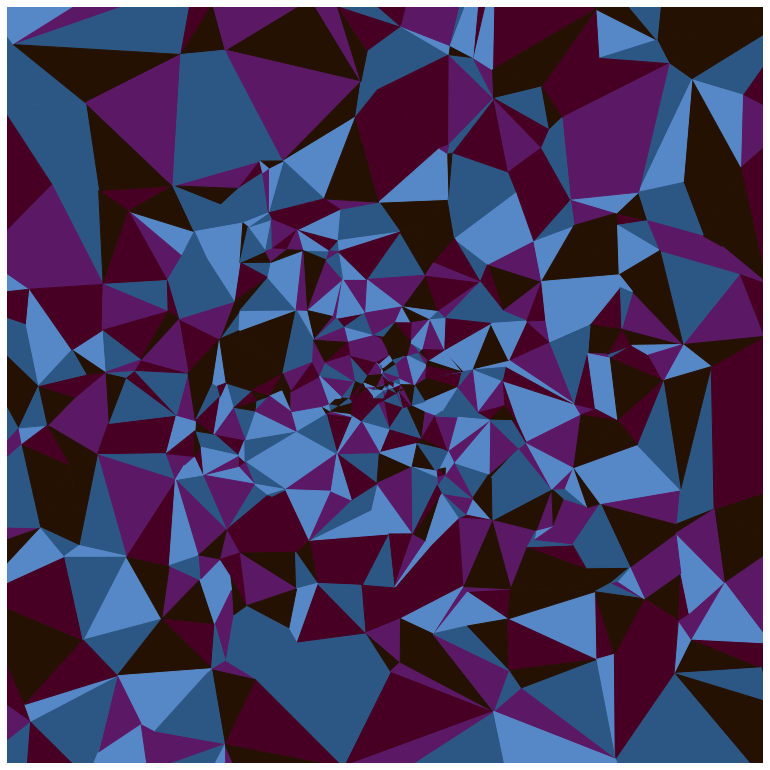

In [17]:
n_points = 2**9

Rs = np.abs(rng.normal(size=n_points))
Thetas = 2*np.pi*rng.random(n_points)
points = np.vstack((Rs*np.cos(Thetas),Rs*np.sin(Thetas))).T

delaunay = spatial.Delaunay(points)


colors = midnight_blue

fig = plt.figure(figsize=(10.8,10.8))
fig.patch.set_alpha(1)
ax = plt.gca()
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.axis('off')
plot_delaunay(delaunay,ax,colors = colors)
fig.tight_layout()
fig.savefig('delaunay-midnight.png',dpi=200,bbox_inches='tight',pad_inches=0.0)
plt.show()

## Voronoi cells

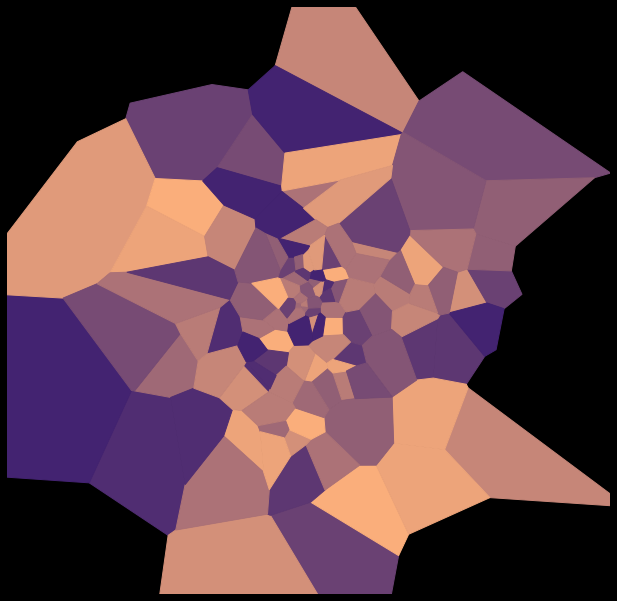

In [28]:
n_points = 2**7
max_r = 4
pallete = palletes.midnight_gradient


Rs = np.abs(0.25*max_r*rng.normal(size=n_points))
Rs = Rs[Rs <= max_r].copy()

Thetas = 2*np.pi*rng.random(len(Rs))

points = np.vstack((Rs*np.cos(Thetas),Rs*np.sin(Thetas))).T

voronoi = spatial.Voronoi(points)
fig, ax = plt.subplots(figsize=(10.8,10.8))
fig.patch.set_alpha(1)
fig.set_facecolor('k')

ax.set_xlim(-0.5*max_r,0.5*max_r)
ax.set_ylim(-0.5*max_r,0.5*max_r)

for region in voronoi.regions:

    if -1 in region:
        continue

    poly_points = voronoi.vertices[region]
    color = rng.choice(pallete)
    poly = mpl.patches.Polygon(poly_points,closed=True,ec=color,fc=color)

    ax.add_patch(poly)

#ax.scatter(points[:,0],points[:,1],color='k')
ax.axis('off')
plt.show()